# Artyom Iudin BVT2101

In [45]:
import numpy as np
import matplotlib.pyplot as plt

import typing as tp

In [79]:
def load_txt(path: str) -> np.ndarray:
    return np.loadtxt(path, delimiter=" ")

def save_txt(arr: np.ndarray, filename: str) -> None:
    np.savetxt(filename, arr, fmt="%s")

save_txt(load_txt("array.txt"), "array2.txt")

In [69]:
def first(vec1: np.ndarray, vec2: np.ndarray) -> np.ndarray:
	return (vec1 @ vec2).sum(axis = 0)

save_txt(first(load_txt("array.txt"), load_txt("array2.txt")), "first.txt")

In [81]:
load_txt("array.txt") 

array([[1., 0.],
       [2., 3.]])

In [87]:
def second(vec: np.ndarray) -> np.ndarray:
    binarize = np.vectorize(np.binary_repr)
    vec = vec.astype(int)
    return binarize(vec, width=(len(bin(int(max(vec))))-2))

# arr=np.array([1,2,3,4,5,6,7,8,9])
# save_txt(arr, "vector.txt")
save_txt(second(load_txt("vector.txt")), "second.txt")

In [91]:
def third(mat: np.ndarray) -> np.ndarray:
    return np.unique(mat, axis=0)

# arr = np.array([[1,2],
#                 [1,2],
#                 [2,3]]) 
# save_txt(arr, "arr3d.txt")  
save_txt(third(load_txt("arr3d.txt")), "third.txt")

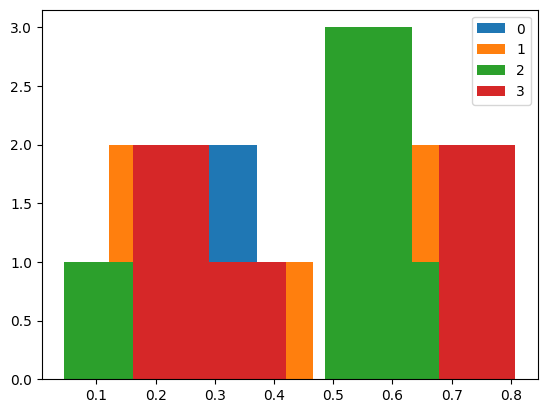

In [92]:
def forth(M: int, N: int) -> None:
    mat = np.random.random((M, N))
    for i in range(mat.shape[0]):
        plt.hist(mat[i], bins=N, label=str(i))
    plt.legend()
    return mat.mean(axis=0), mat.std(axis=0)

save_txt(forth(4, 5), "forth.txt")

In [93]:
def fifth(M: int, 
          N: int, 
          a: tp.Union[int, float], 
          b: tp.Union[int, float]) -> np.ndarray:
    mat = np.array([np.array([b]*N)]*M)
    mat[(N+1)%2::2, ::2] = a
    mat[N%2::2, 1::2] = a   
    return mat

save_txt(fifth(4,5,1,2), "fifth.txt")

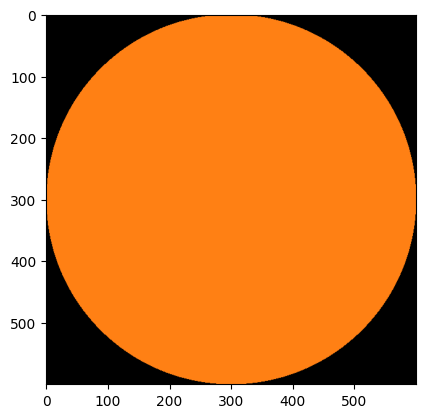

In [13]:
def sixth(r: int, g: int, b: int, radius: int) -> None:
    img = np.zeros((radius*2, radius*2, 3), dtype=np.uint8)
    center_x = center_y = radius
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2:
                img[y, x, :] = [r, g, b]

    plt.imshow(img)

sixth(255, 128, 20, 300)

In [95]:
def seventh(tens: np.ndarray) -> np.ndarray:
    return (tens - tens.mean()) / tens.std()

save_txt(seventh(load_txt("arr3d.txt")), "seventh.txt")

In [96]:
def eigth(mat: np.ndarray, 
          shape: tuple[int], 
          center: tuple[int],
          fill: tp.Optional[int] = None):
    vertical_half, horisontal_half = shape[0] // 2, shape[1] // 2

    left_border = np.maximum(center[1] - horisontal_half, 0)
    right_border = np.minimum(center[1] + horisontal_half + 1, shape[1])
    upper_border = np.maximum(center[0] - vertical_half, 0)
    ground_border = np.minimum(center[0] + vertical_half + 1, shape[0])

    if fill is None:
        mat2 = np.zeros((ground_border - upper_border, right_border - left_border))
    else:
        mat2 = np.ones((ground_border - upper_border, right_border - left_border)) * fill

    return mat2 + mat[upper_border:ground_border, left_border:right_border]

save_txt(eigth(load_txt("array.txt"), (3,3), (0,0)), "eigth.txt")

In [99]:
def ninth(mat: np.ndarray) -> np.ndarray:
    mat = mat.astype(int)
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 
                               axis=1, 
                               arr=mat)

# arr = np.array([[1,2,1],
#                 [2,2,3],
#                 [6,5,5]])
# save_txt(arr, "arr3d2.txt")
save_txt(ninth(load_txt("arr3d2.txt")), "ninth.txt")

array([1, 2, 5], dtype=int64)

In [104]:
def tenth(tens: np.ndarray, weights: np.ndarray) -> np.ndarray:
    return (tens * weights[:]).sum(axis=2)

weights = np.array([0.4, 0.3, 0.1])
save_txt(weights, "weights.txt")
save_txt(tenth(np.ones((4,4,3)), load_txt("weights.txt")), "tenth")